In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv("Downloads/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
x=df.drop(columns=["math score"],axis=1)
x.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [19]:
y=df["math score"]
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [21]:
num_cols=x.select_dtypes(exclude="object").columns
cat_cols=x.select_dtypes(include="object").columns


In [27]:
num_trans=StandardScaler()
oh_tran=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_tran,cat_cols),
        ("StandardScaler",num_trans,num_cols),
    ]
)

In [29]:
x1=preprocessor.fit_transform(x)
x1

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [33]:
x1.shape

(1000, 19)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=23)

In [57]:
def evaluate(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_absolute_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,mse,rmse,r2

In [59]:
models={"LR":LinearRegression(),"Lasso":Lasso(),"Ridge":Ridge(),"KNN":KNeighborsRegressor(),"DT":DecisionTreeRegressor(),"RF":RandomForestRegressor()}

In [69]:
model_list=[]
r2_list=[]



In [75]:
print('-------------------------------------------')
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('-------------------------------------------\n')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)
print('-------------------------------------------\n')


-------------------------------------------
LR
Model performance for Training set
- Root Mean Squared Error: 2.0416
- Mean Absolute Error: 4.1681
- R2 Score: 0.8815
-------------------------------------------

Model performance for Test set
- Root Mean Squared Error: 2.1386
- Mean Absolute Error: 4.5734
- R2 Score: 0.8524
Lasso
Model performance for Training set
- Root Mean Squared Error: 2.2803
- Mean Absolute Error: 5.1997
- R2 Score: 0.8162
-------------------------------------------

Model performance for Test set
- Root Mean Squared Error: 2.2584
- Mean Absolute Error: 5.1005
- R2 Score: 0.7967
Ridge
Model performance for Training set
- Root Mean Squared Error: 2.0414
- Mean Absolute Error: 4.1672
- R2 Score: 0.8815
-------------------------------------------

Model performance for Test set
- Root Mean Squared Error: 2.1371
- Mean Absolute Error: 4.5672
- R2 Score: 0.8525
KNN
Model performance for Training set
- Root Mean Squared Error: 2.1379
- Mean Absolute Error: 4.5705
- R2 Sc

In [77]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,Ridge,0.852517
2,Ridge,0.852517
14,Ridge,0.852517
0,LR,0.852377
12,LR,0.852377
6,LR,0.852377
11,RF,0.806058
5,RF,0.805901
17,RF,0.803937
1,Lasso,0.796734


In [81]:
linearmodel=LinearRegression(fit_intercept=True)
linearmodel=linearmodel.fit(x_train,y_train)
y_predict=linearmodel.predict(x_test)
score=r2_score(y_test,y_predict)*100
print("THEREFORE THE ACCURACY OF THE MODEL IS %.2f" %score)

THEREFORE THE ACCURACY OF THE MODEL IS 85.24


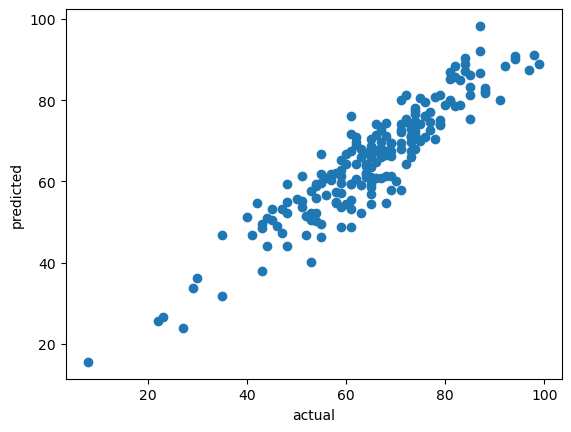

In [85]:
plt.scatter(y_test,y_predict);
plt.xlabel("actual");
plt.ylabel("predicted");

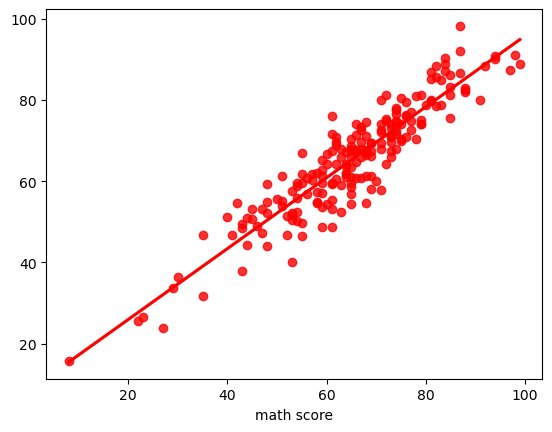

In [87]:
sns.regplot(x=y_test,y=y_predict,ci=None,color="red");

In [97]:
predict_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_predict,'Difference':y_test-y_predict})
predict_df

,Actual Value,Predicted Value,Difference
519,67,66.003977,0.996023
837,75,69.919265,5.080735
208,74,67.990259,6.009741
525,68,71.094116,-3.094116
978,55,49.586599,5.413401
...,...,...,...
647,64,61.992020,2.007980
481,52,46.828127,5.171873
134,74,73.568230,0.431770
366,69,57.981808,11.018192
